In [1]:
!nvidia-smi

Mon Aug  7 12:28:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    46W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
Home = os.getcwd()
print(Home)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 24.9/166.8 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
%cd {Home}

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HzlZPYO6AuitH4w8JMcK")
project = rf.workspace("tuc-marshall").project("insulator-detector-m18s0")
dataset = project.version(4).download("yolov8")


/content
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.149, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Insulator-Detector-4 in yolov8:: 100%|██████████| 14468/14468 [00:02<00:00, 5925.99it/s]


In [7]:
%cd {Home}
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 420MB/s]
Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Insulator-Detector-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tr

In [8]:
!ls {Home}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch33390.jpg
events.out.tfevents.1691411504.25c99ecd3090.3482.0  train_batch33391.jpg
F1_curve.png					    train_batch33392.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


/content


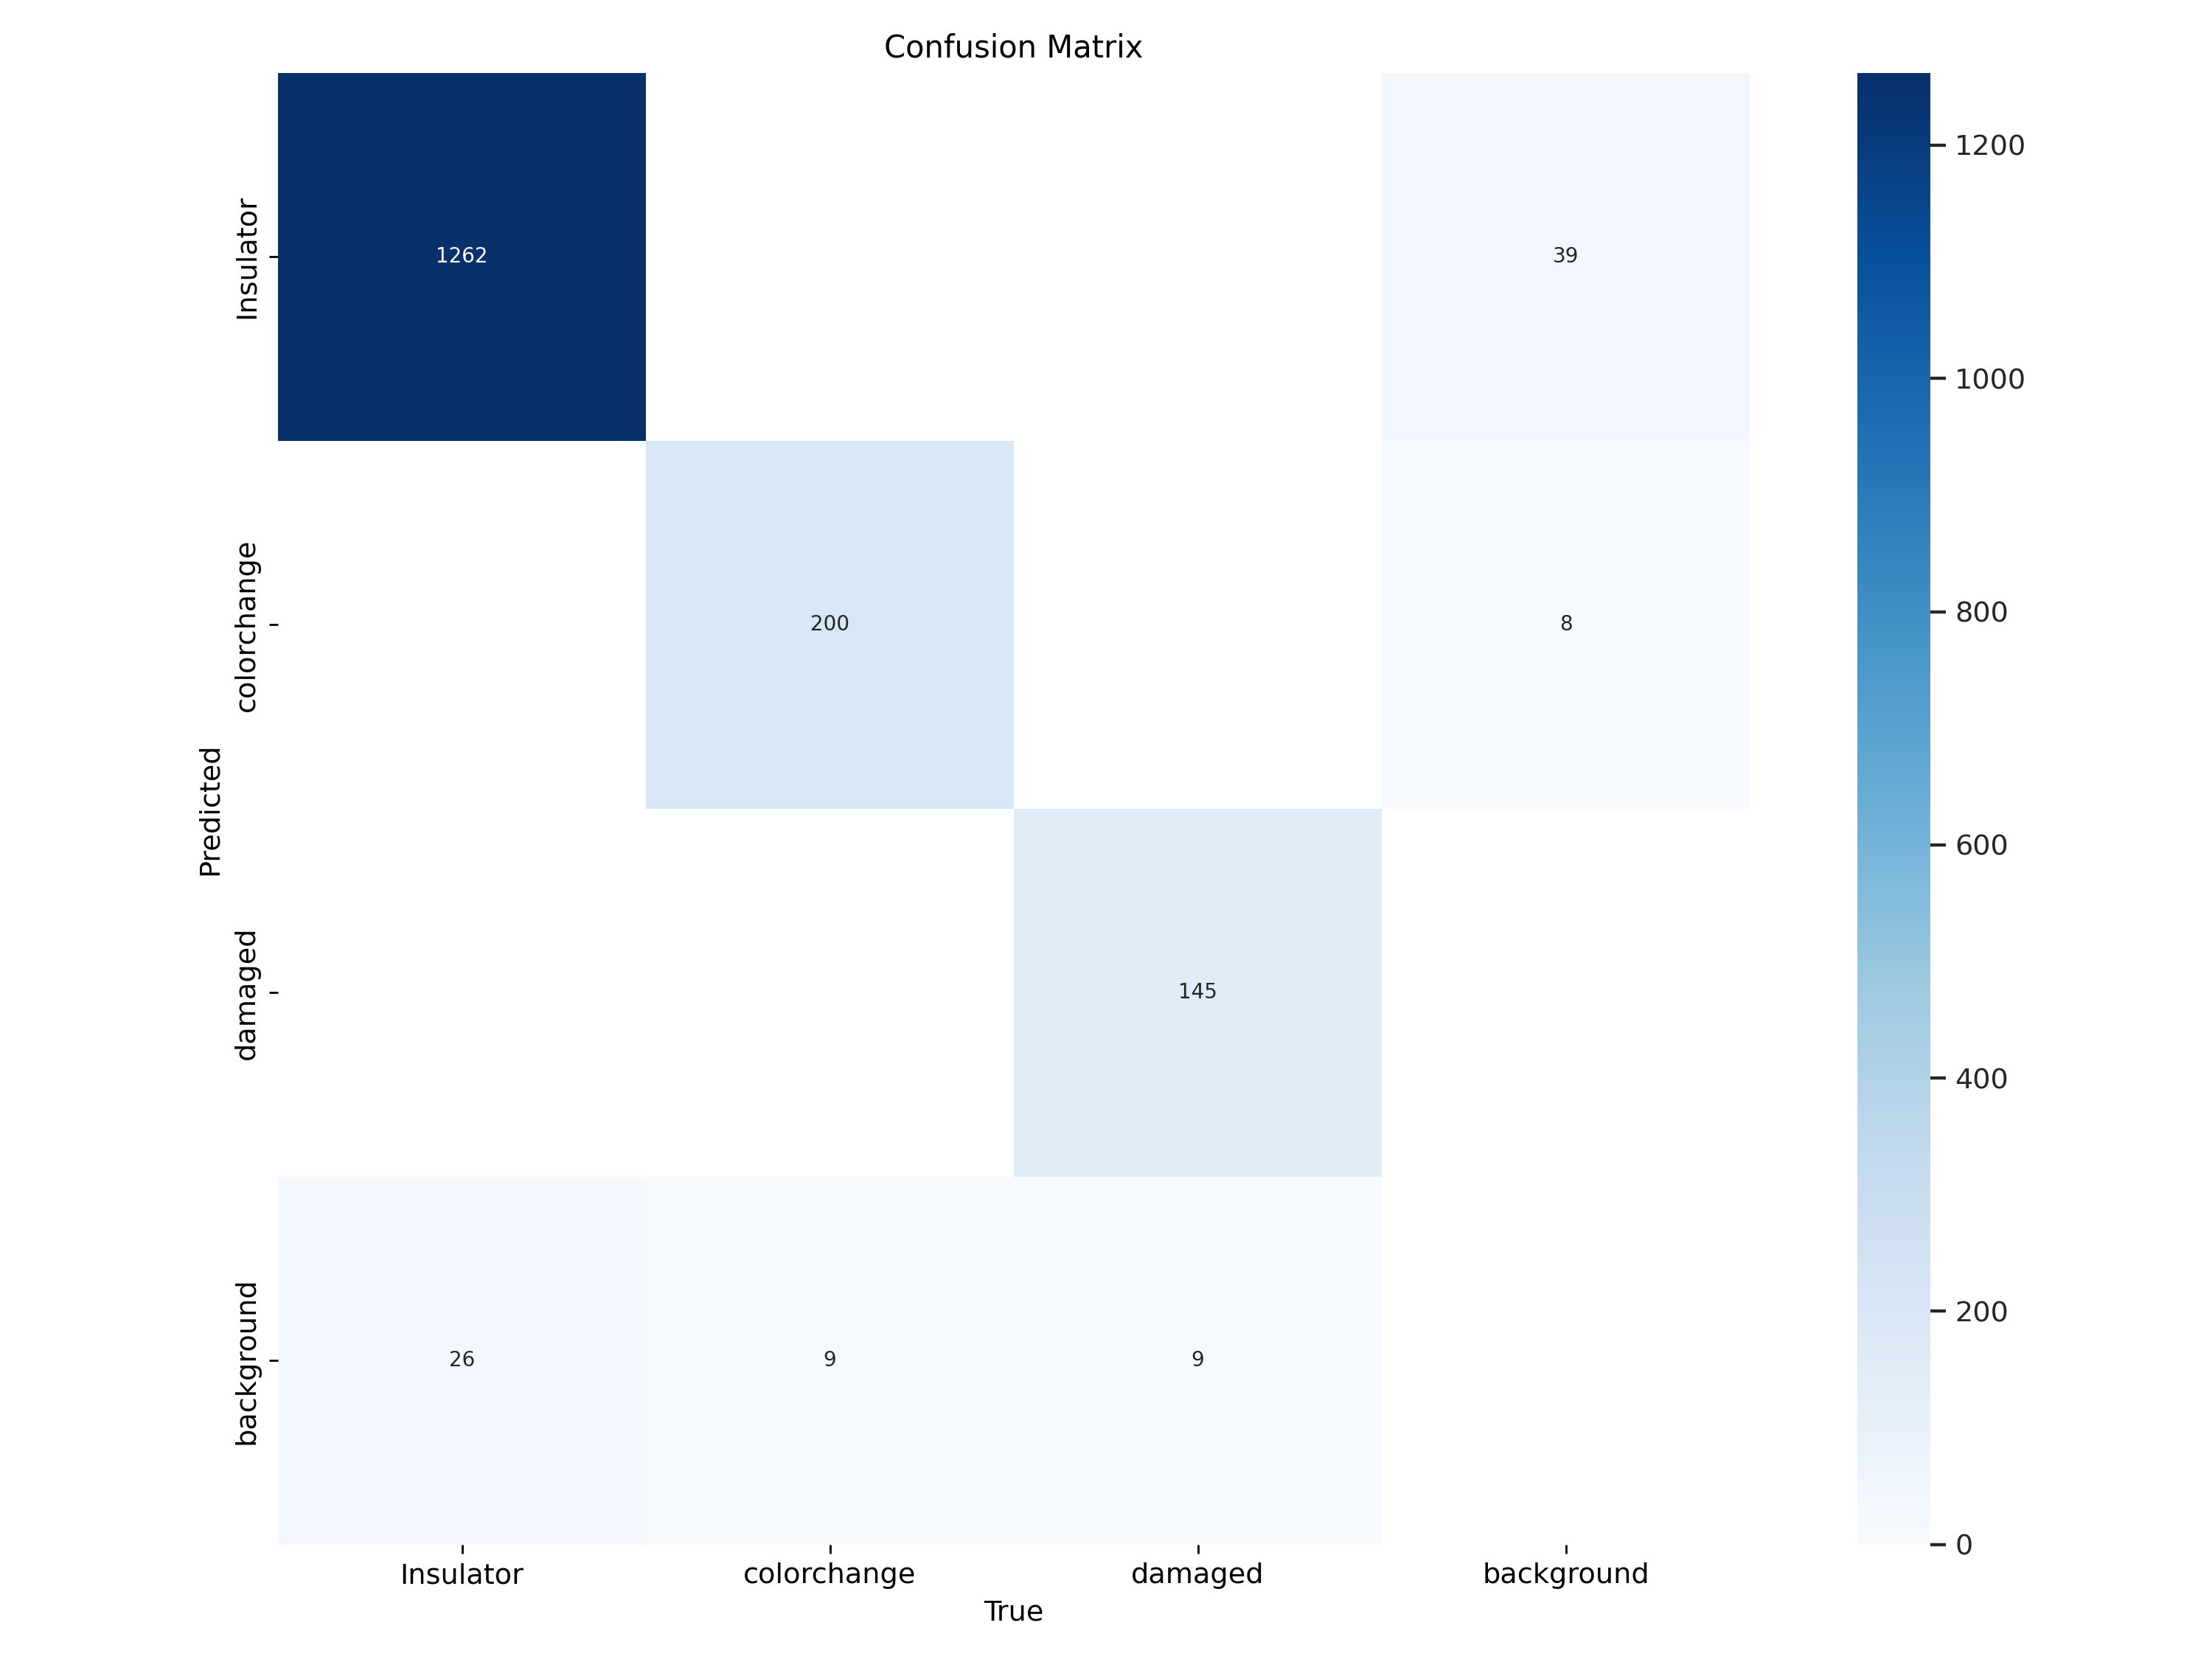

In [9]:
%cd {Home}
Image (filename=f'{Home}/runs/detect/train/confusion_matrix.png', width=600)

/content


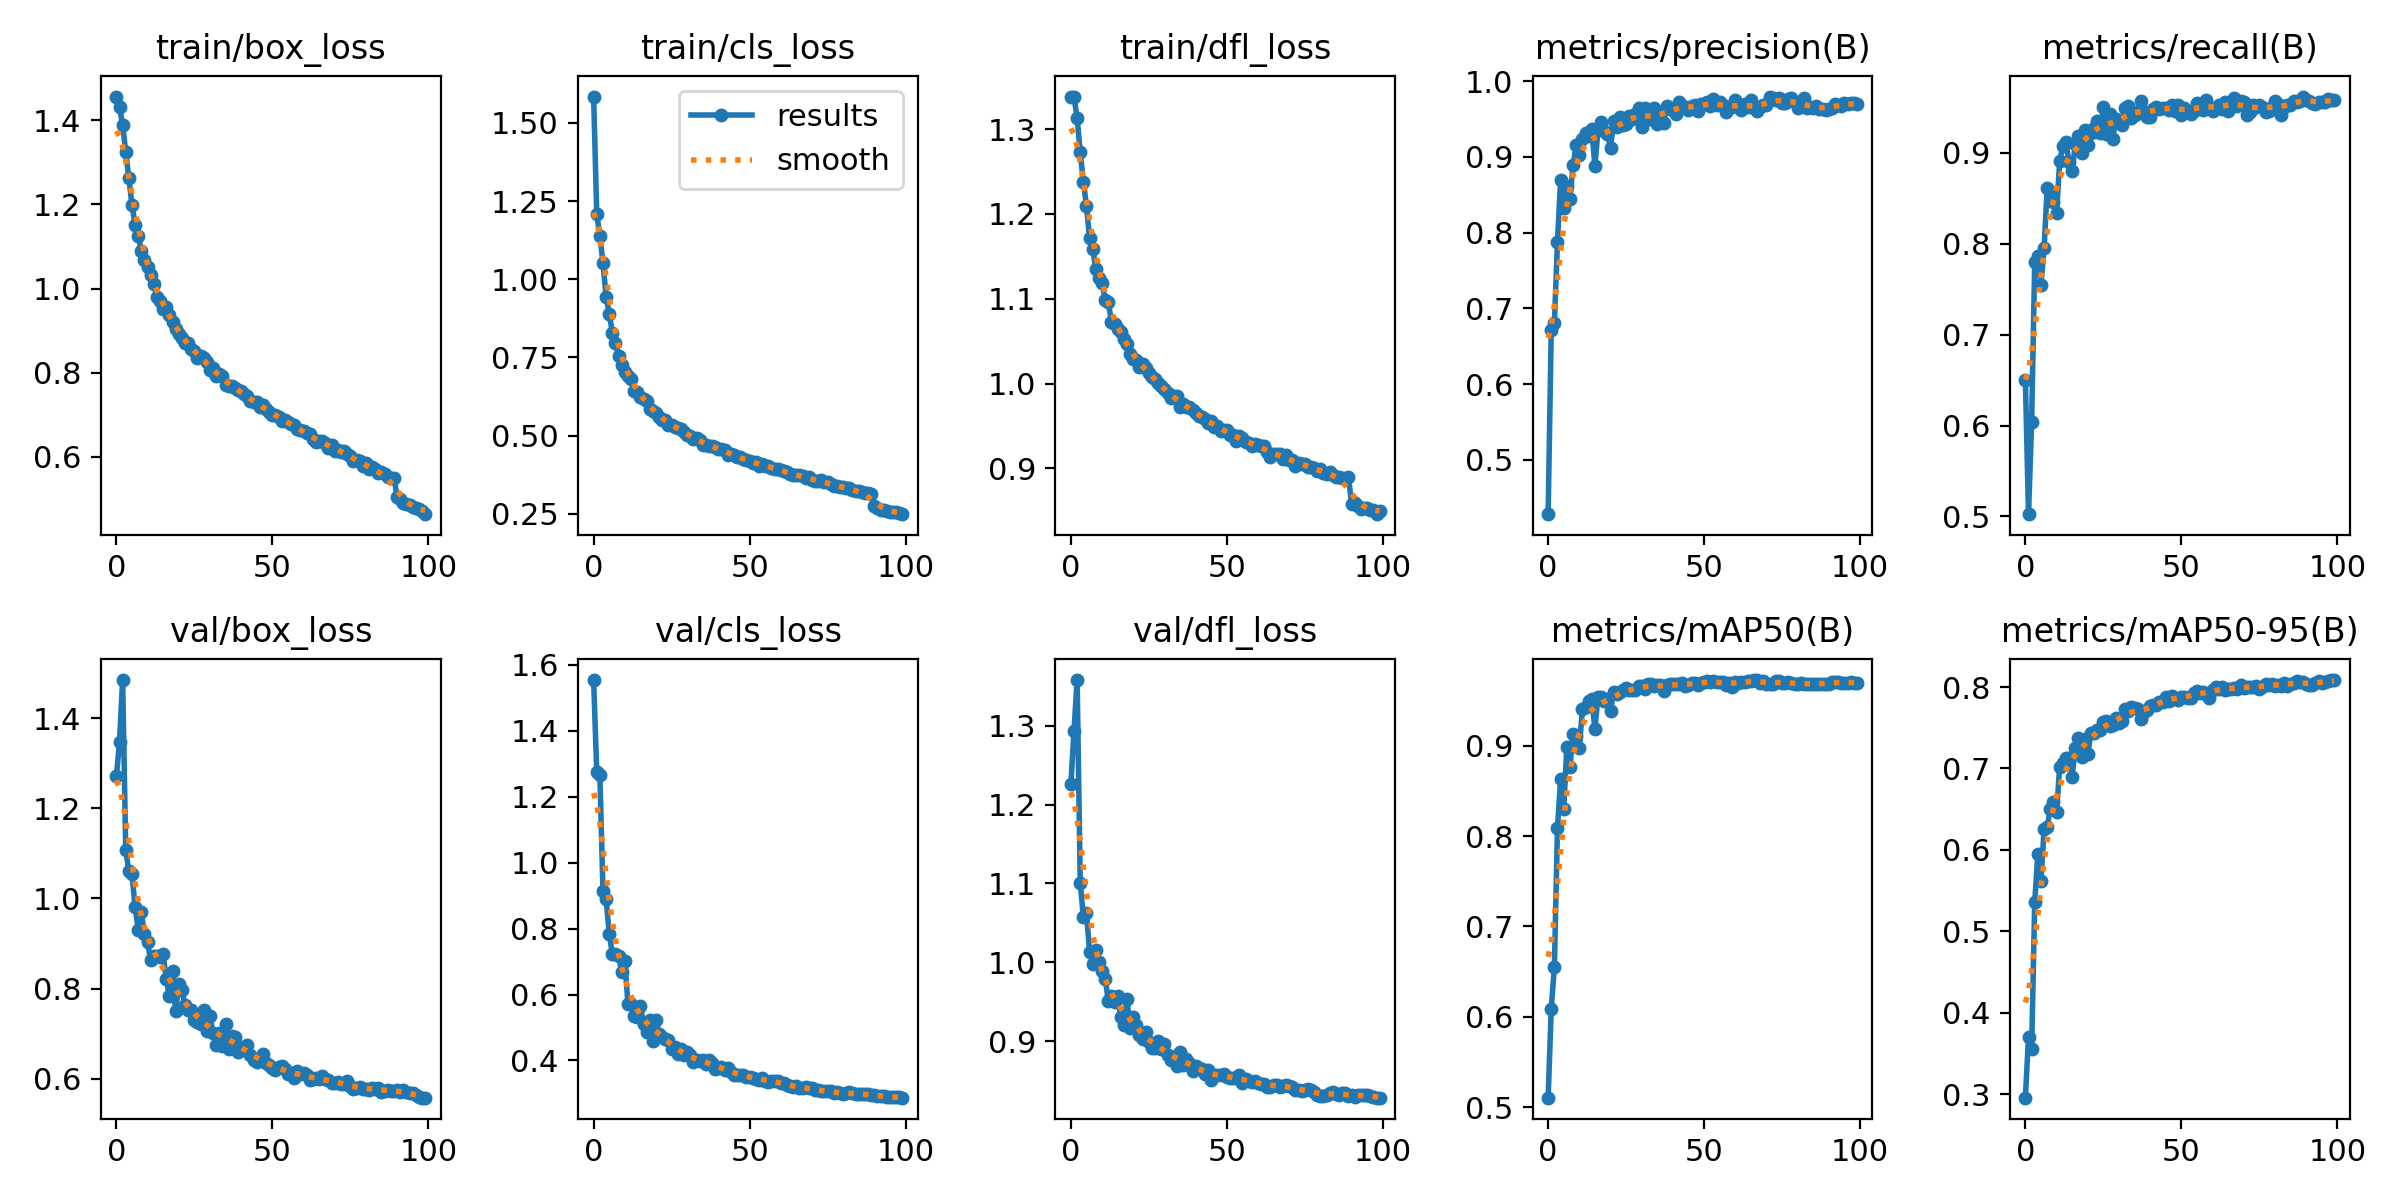

In [10]:
%cd {Home}
Image(filename=f'{Home}/runs/detect/train/results.png', width=600)

/content


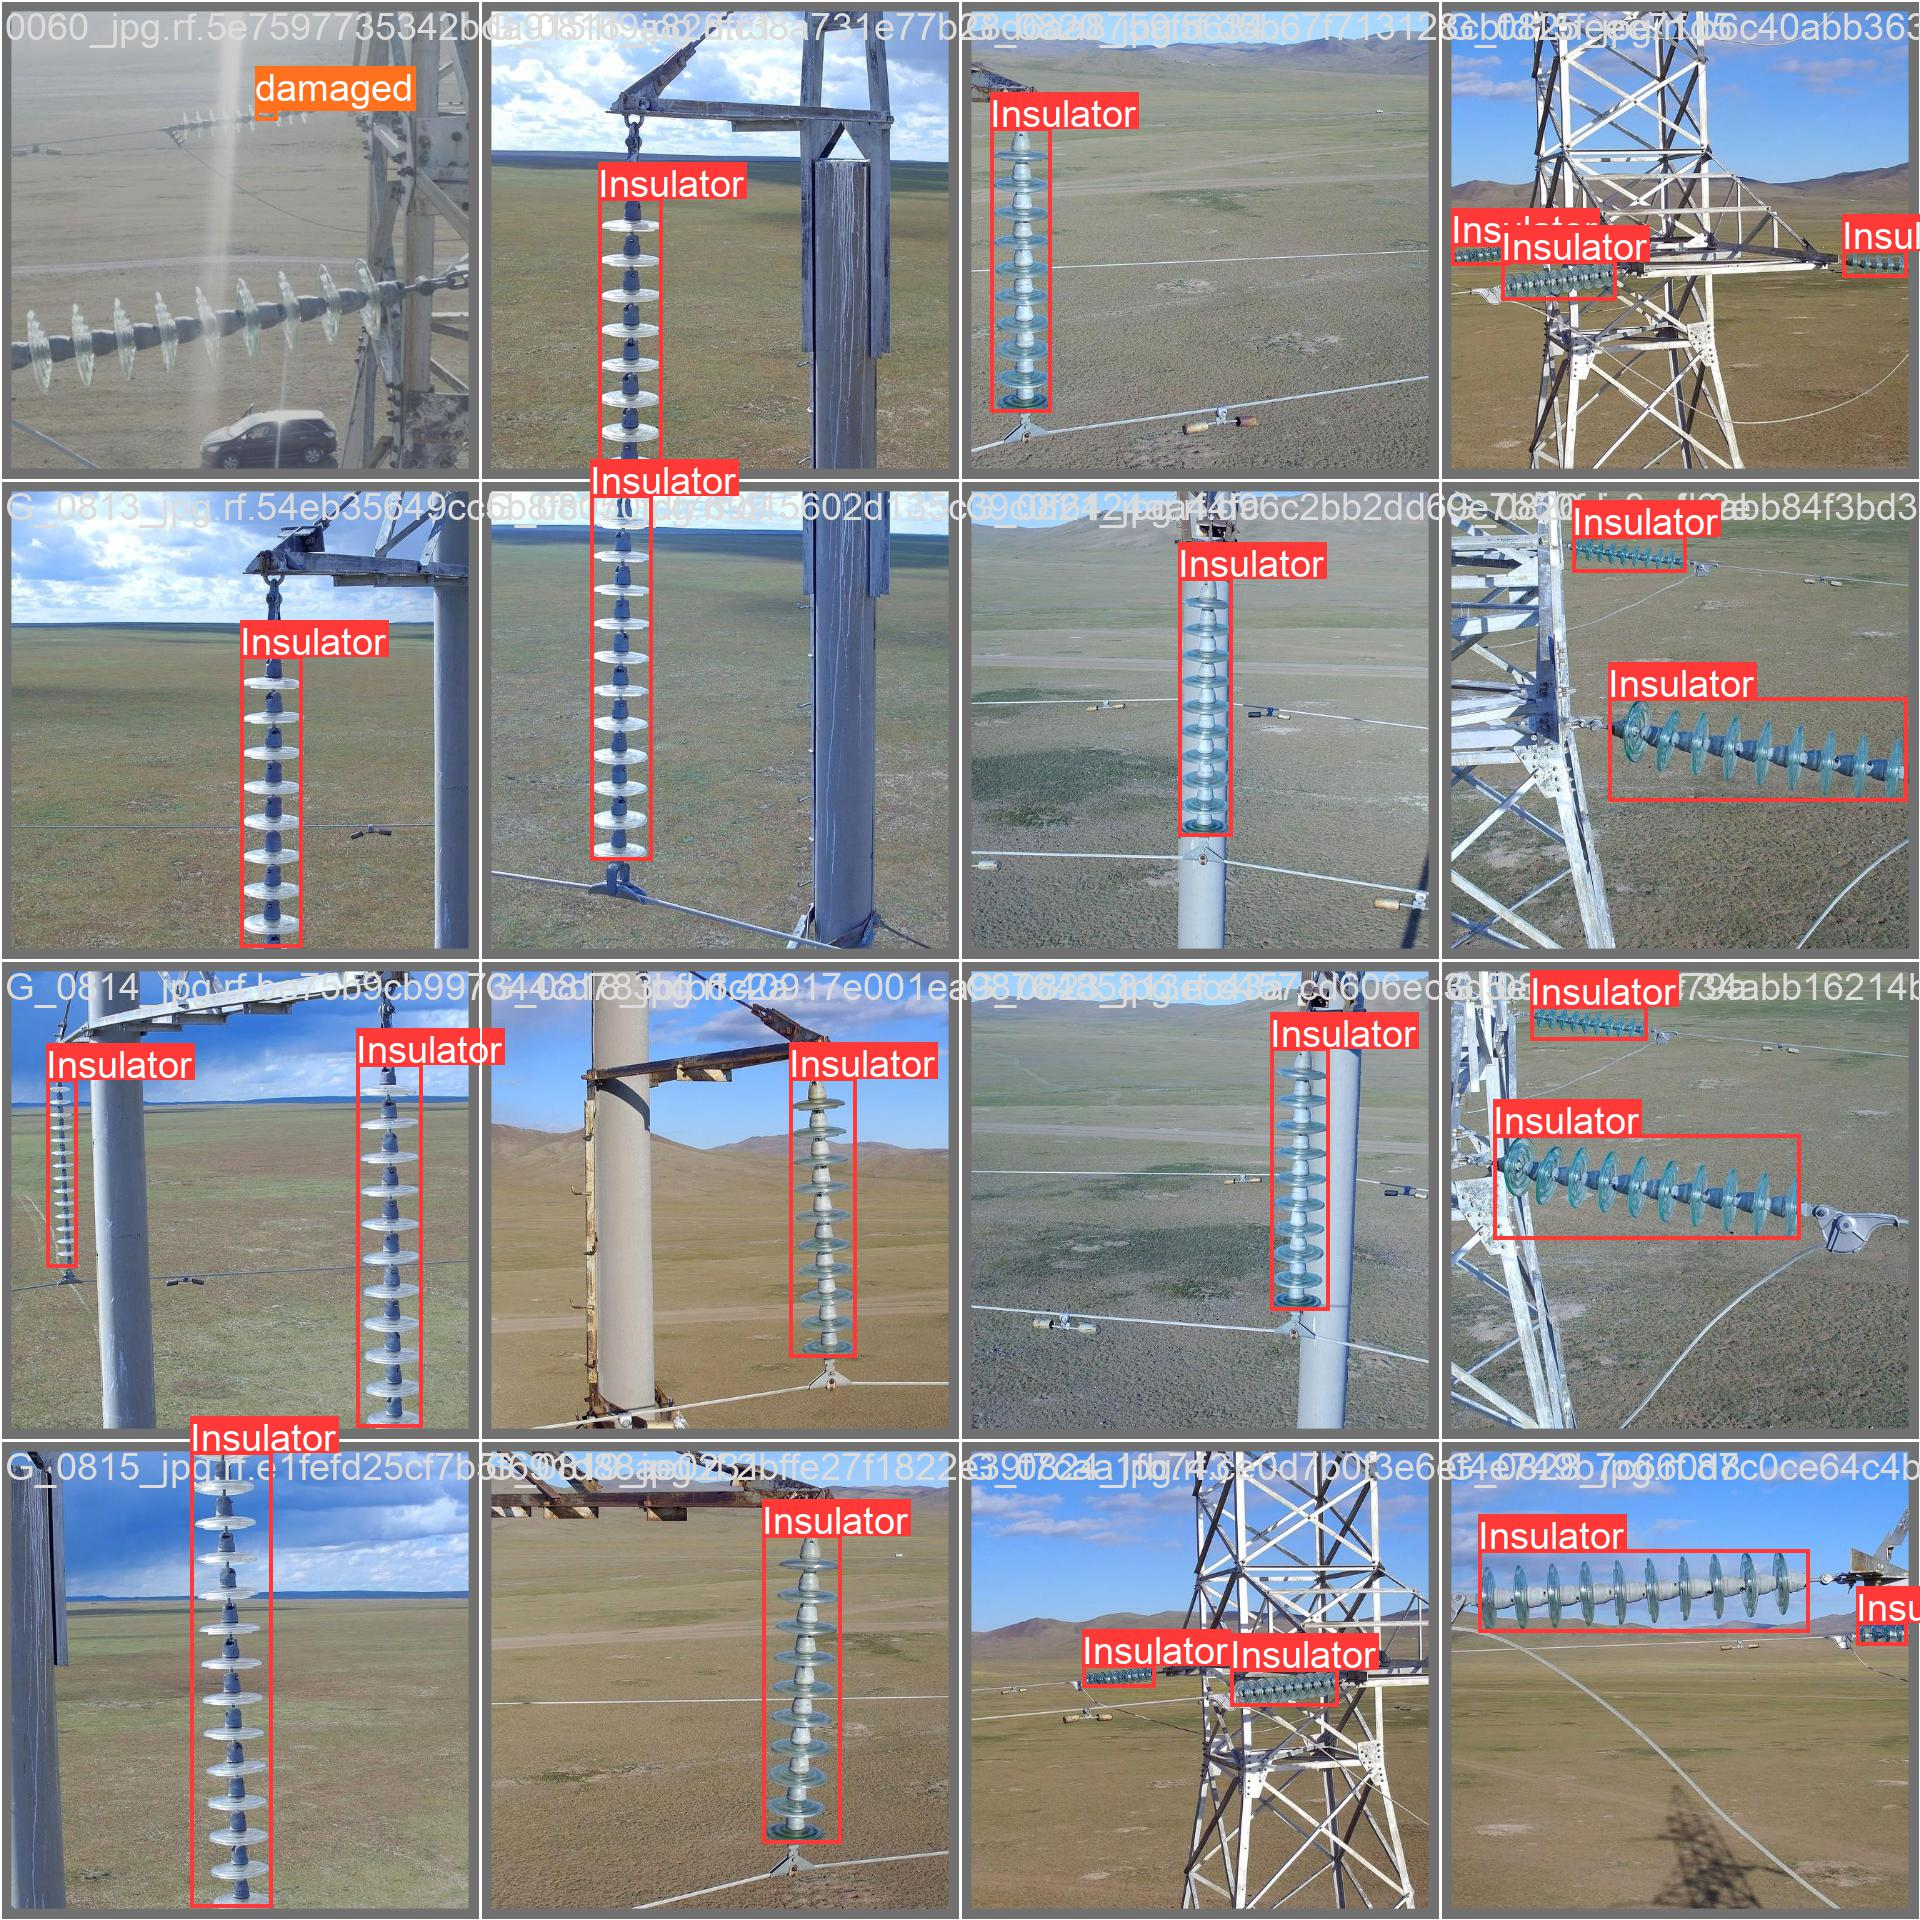

In [11]:
%cd {Home}
Image(filename=f'{Home}/runs/detect/train/val_batch0_labels.jpg', width=600)

In [12]:
%cd {Home}
!yolo task=detect mode=val model={Home}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients
val: Scanning /content/Insulator-Detector-4/valid/labels.cache... 942 images, 0 backgrounds, 0 corrupt: 100% 942/942 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 59/59 [00:09<00:00,  6.40it/s]
                   all        942       1651      0.971      0.958       0.97      0.809
             Insulator        942       1288      0.985      0.975       0.99      0.876
           colorchange        942        209      0.941      0.957      0.974      0.819
               damaged        942        154      0.986      0.942      0.945      0.732
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val


In [13]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients

image 1/364 /content/Insulator-Detector-4/test/images/0180_jpg.rf.48121ba5db963843ccd7bbffdd290639.jpg: 640x640 1 damaged, 8.5ms
image 2/364 /content/Insulator-Detector-4/test/images/0437_jpg.rf.7da7572d854e46f0f7679b1cd2680258.jpg: 640x640 1 damaged, 8.5ms
image 3/364 /content/Insulator-Detector-4/test/images/0477_jpg.rf.418ed33a35e9db4c5ca4d8f818dc872e.jpg: 640x640 1 damaged, 8.9ms
image 4/364 /content/Insulator-Detector-4/test/images/0545_jpg.rf.307f3fa14313f73250b56628896e2edb.jpg: 640x640 2 colorchanges, 8.4ms
image 5/364 /content/Insulator-Detector-4/test/images/0570_jpg.rf.49161113ccf384bd96c322d503e65d4d.jpg: 640x640 1 damaged, 7.9ms
image 6/364 /content/Insulator-Detector-4/test/images/0590_jpg.rf.1c3e92970525b649c467e6b553aff71a.jpg: 640x640 1 colorchange, 7.7ms
image 7/364 /content/Insulator-Detecto

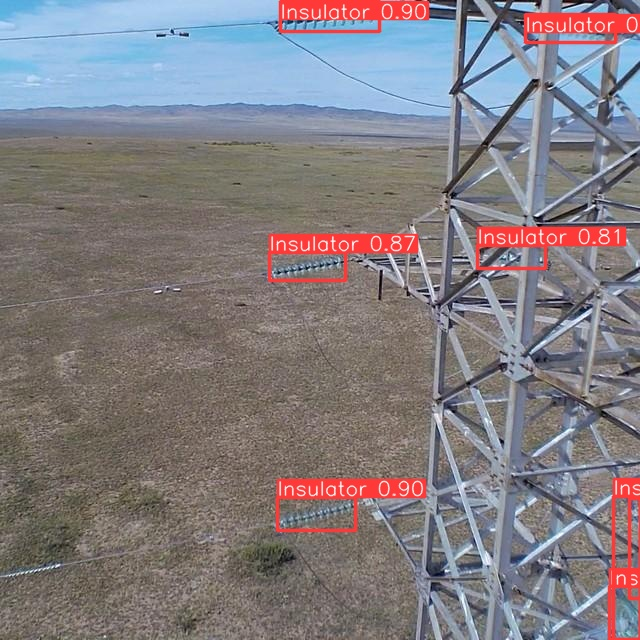

In [36]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{Home}/runs/detect/predict/A_0273_jpg.rf.25300936c62774085d15bb1375ef0199.jpg')[:1]:
  display (Image(filename=image_path, width=600))
  print("\n")

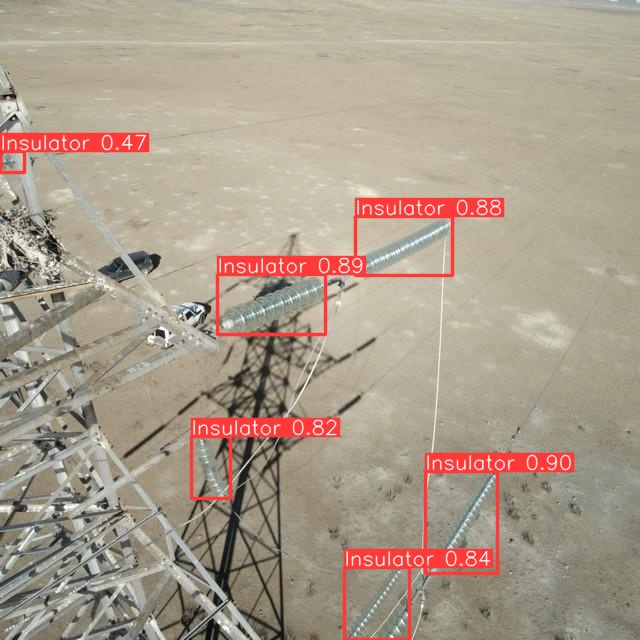

In [39]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{Home}/runs/detect/predict/A_0621_jpg.rf.a3b761c0376abee6179b6ca812bbdaa5.jpg')[:1]:
  display (Image(filename=image_path, width=600))
  print("\n")

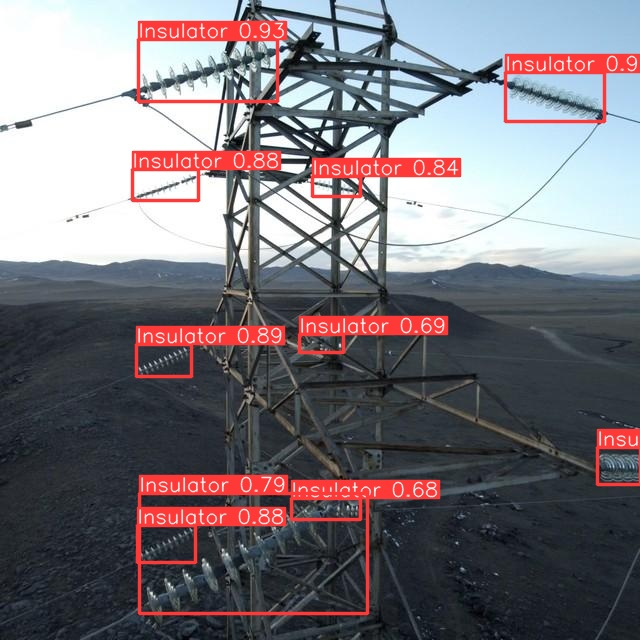

In [42]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{Home}/runs/detect/predict/B_0099_jpg.rf.9acffd546bec048d34fbdb68d22fc220.jpg')[:1]:
  display (Image(filename=image_path, width=600))
  print("\n")

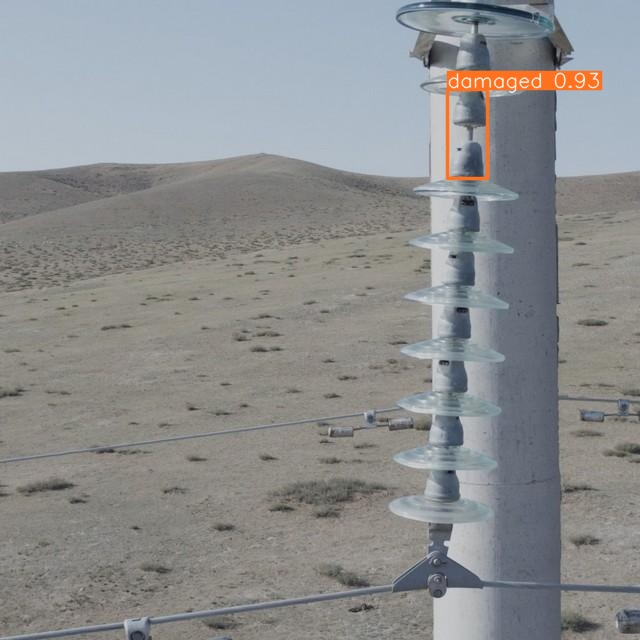

In [40]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{Home}/runs/detect/predict/7060_jpg.rf.bd6bb4879181b0f2e5d79ad0b384e6f2.jpg')[:1]:
  display (Image(filename=image_path, width=600))
  print("\n")

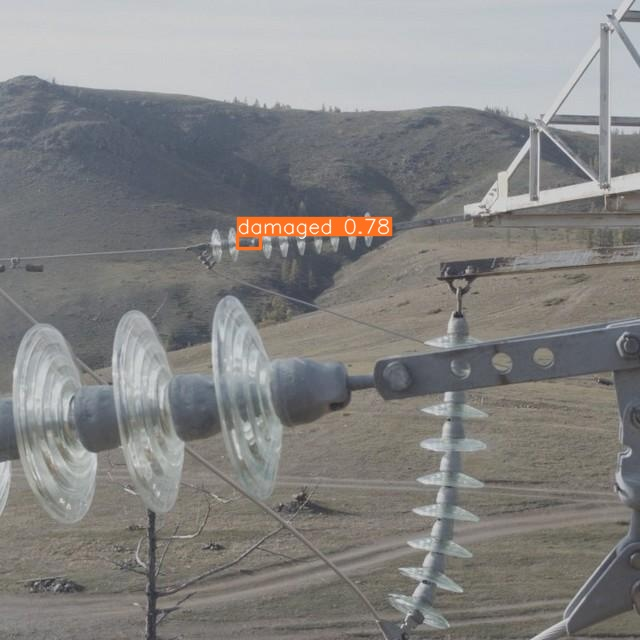

In [41]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{Home}/runs/detect/predict/4551_jpg.rf.cfe4a3580b08e9a23e19fbce7d5cecc9.jpg')[:1]:
  display (Image(filename=image_path, width=600))
  print("\n")

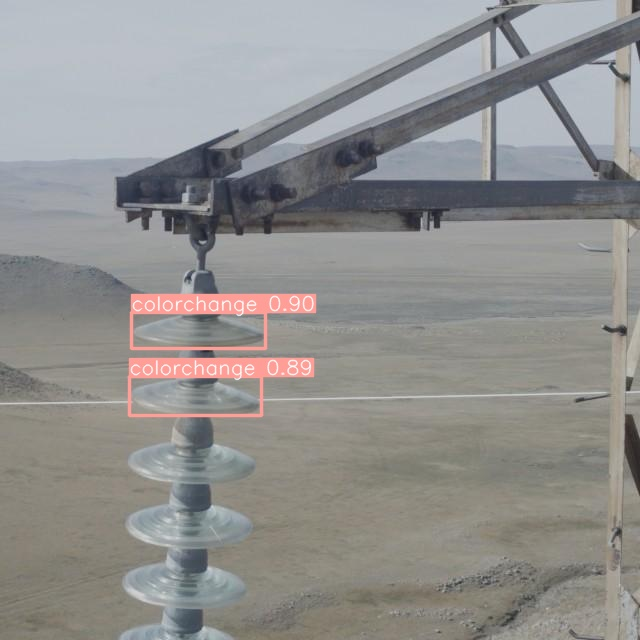

In [15]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{Home}/runs/detect/predict/2431_jpg.rf.a669fc8c1689413662099f42173d4fde.jpg')[:1]:
  display (Image(filename=image_path, width=600))
  print("\n")

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'{Home}/runs/detect/predict/3171_jpg.rf.50a446b7557b7c2e2cd2dfd4168d7ace.jpg')[:1]:
  display (Image(filename=image_path, width=600))
  print("\n")

In [ ]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.25 source=/runs/detect/train/Screen_Recording_20230807_161843_YouTube.mp4

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f'{Home}/runs/detect/train/')